<a href="https://colab.research.google.com/github/artemiscastell-cyber/Credit-Risk-Model/blob/main/%E4%BF%A1%E7%94%A8%E9%A2%A8%E9%9A%AA%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$laufkont = status

1 : no checking account

2 : … < 0 DM

3 : 0<= … < 200 DM

4 : … >= 200 DM / salary for at least 1 year

$laufzeit = duration

$moral = credit_history

0 : delay in paying off in the past

1 : critical account/other credits elsewhere

2 : no credits taken/all credits paid back duly

3 : existing credits paid back duly till now

4 : all credits at this bank paid back duly

$verw = purpose

0 : others

1 : car (new)

2 : car (used)

3 : furniture/equipment

4 : radio/television

5 : domestic appliances

6 : repairs

7 : education

8 : vacation

9 : retraining

10 : business

$hoehe = amount

$sparkont = savings

1 : unknown/no savings account

2 : … < 100 DM

3 : 100 <= … < 500 DM

4 : 500 <= … < 1000 DM

5 : … >= 1000 DM

$beszeit = employment_duration

1 : unemployed

2 : < 1 yr

3 : 1 <= … < 4 yrs

4 : 4 <= … < 7 yrs

5 : >= 7 yrs

$rate = installment_rate

1 : >= 35

2 : 25 <= … < 35

3 : 20 <= … < 25

4 : < 20

$famges = personal_status_sex

1 : male : divorced/separated

2 : female : non-single or male : single

3 : male : married/widowed

4 : female : single

$buerge = other_debtors

1 : none

2 : co-applicant

3 : guarantor

$wohnzeit = present_residence

1 : < 1 yr

2 : 1 <= … < 4 yrs

3 : 4 <= … < 7 yrs

4 : >= 7 yrs

$verm = property

1 : unknown / no property

2 : car or other

3 : building soc. savings agr./life insurance

4 : real estate

$alter = age

$weitkred = other_installment_plans

1 : bank

2 : stores

3 : none

$wohn = housing

1 : for free

2 : rent

3 : own

$bishkred = number_credits

1 : 1

2 : 2-3

3 : 4-5

4 : >= 6

$beruf = job

1 : unemployed/unskilled - non-resident

2 : unskilled - resident

3 : skilled employee/official

4 : manager/self-empl./highly qualif. employee

$pers = people_liable

1 : 3 or more

2 : 0 to 2

$telef = telephone

1 : no

2 : yes (under customer name)

$gastarb = foreign_worker

1 : yes

2 : no

$kredit = credit_risk

0 : bad

1 : good

In [ ]:
import pandas as pd  # 數據處理
import numpy as np   # 數學運算
import matplotlib.pyplot as plt # 畫圖用
import seaborn as sns # 畫圖用

# 載入資料
# pd.read_csv: 讀取 csv 檔案的函數
df = pd.read_csv('german_credit_data.csv')

# df.head(): 查看前 5 筆資料
print(df.head())

# df.info(): 查看欄位型態，檢查是否有原本該是數字的被讀成文字
print(df.info())

   laufkont  laufzeit  moral  verw  hoehe  sparkont  beszeit  rate  famges  \
0         1        18      4     2   1049         1        2     4       2   
1         1         9      4     0   2799         1        3     2       3   
2         2        12      2     9    841         2        4     2       2   
3         1        12      4     0   2122         1        3     3       3   
4         1        12      4     0   2171         1        3     4       3   

   buerge  ...  verm  alter  weitkred  wohn  bishkred  beruf  pers  telef  \
0       1  ...     2     21         3     1         1      3     2      1   
1       1  ...     1     36         3     1         2      3     1      1   
2       1  ...     1     23         3     1         1      2     2      1   
3       1  ...     1     39         3     1         2      2     1      1   
4       1  ...     2     38         1     2         2      2     2      1   

   gastarb  kredit  
0        2       1  
1        2       1  
2    

#資料前處理 (Preprocessing)

重新定義目標變數：在風險管理中，通常預測「違約機率 (PD)」。

目前的資料：1 = 好人, 0 = 壞人。 而習慣：1 = 壞人 (Default), 0 = 好人 (Non-Default)。

轉換一下，這樣模型算出來的機率越高，代表風險越高，比較符合直覺。

In [ ]:
# 使用 lambda 函數重新編碼：如果原本是 0 (壞人)，就變成 1 (違約)；否則變成 0
df['target'] = df['kredit'].apply(lambda x: 1 if x == 0 else 0)

# 檢查一下轉換後的比例
# value_counts(): 計算每個類別有幾筆
print(df['target'].value_counts())
# 結果應為：0 (好人) 700筆, 1 (壞人) 300筆

target
0    700
1    300
Name: count, dtype: int64


#數據清洗 (Data Cleaning)

##A. 處理遺漏值 (Missing Values)

銀行資料常會有空值，不能直接刪除，因為「沒填資料」本身可能就代表某種意義（例如：沒填收入可能代表無業）。

In [ ]:
# isnull().sum(): 檢查每個欄位有多少空值
print(df.isnull().sum())

# 假設 'hoehe' (貸款金額) 有遺漏值 (雖然這份資料集剛好沒有，但示範寫法)
# 方法 1：補平均值 (適合常態分佈的數值)
# df['hoehe'] = df['hoehe'].fillna(df['hoehe'].mean())

# 方法 2：補中位數 (適合有極端值的數值)
# df['hoehe'] = df['hoehe'].fillna(df['hoehe'].median())

# 方法 3：補一個特殊值 (適合類別變數，例如補 -1 或 'Unknown')
# df['beruf'] = df['beruf'].fillna('Unknown')

laufkont    0
laufzeit    0
moral       0
verw        0
hoehe       0
sparkont    0
beszeit     0
rate        0
famges      0
buerge      0
wohnzeit    0
verm        0
alter       0
weitkred    0
wohn        0
bishkred    0
beruf       0
pers        0
telef       0
gastarb     0
kredit      0
target      0
dtype: int64


##B. 處理異常值 (Outliers)

例如「年齡」欄位出現 150 歲，或者「收入」有一個人是其他人的 100 倍。這會嚴重干擾 Logistic Regression。

常用手法：(Capping / Winsorization)。不刪除資料，而是把大於 99% 的數值強制設為 99% 的那個值。

In [ ]:
# 定義一個處理異常值的函數
def cap_outliers(series):
    # quantile(0.99): 找出第 99 百分位數的值 (也就是前 1% 大的門檻)
    upper_limit = series.quantile(0.99)
    # quantile(0.01): 找出第 1 百分位數的值 (也就是前 1% 小的門檻)
    lower_limit = series.quantile(0.01)

    # clip: 將數值限制在上下限之間，超過的就切掉變成上下限的值
    return series.clip(lower=lower_limit, upper=upper_limit)

# 針對數值型欄位處理，例如 'hoehe' (金額) 和 'alter' (年齡)
df['hoehe'] = cap_outliers(df['hoehe'])
df['alter'] = cap_outliers(df['alter'])

In [ ]:
# 將 'laufkont' (帳戶狀態) 這種分類變數轉為啞變數 (Dummy Variables)
# 把所有類別變數都轉成 Dummy
cat_cols = ['laufkont', 'moral', 'verw', 'sparkont', 'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'weitkred', 'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb']
# 選幾個代表性的。
# columns: 指定要轉換的欄位
# drop_first=True: N個類別只留 N-1 個欄位，避免共線性 (Multicollinearity)
df_model = pd.get_dummies(df, columns=['laufkont', 'moral', 'verw'], drop_first=True)
df_model_all = pd.get_dummies(df, columns=cat_cols, drop_first=True)
# 這裡用 cat_cols 取代了原本手打的那三個欄位

# 準備 X (特徵) 和 y (目標)
# drop: 丟掉目標欄位 (target) 和原始的 (kredit)
X = df_model_all.drop(['kredit', 'target'], axis=1)
y = df_model_all['target']


##建立模型 (Logistic Regression)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
# 1. 切分訓練集與測試集
# test_size=0.3: 30% 資料拿來考試，70% 拿來訓練
# random_state=42: 設定種子，保證每次切分結果一樣 (重現性)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# **資料標準化 (Scaling)
# 雖然羅吉斯迴歸不一定要常態分配，但數值落差太大(例如金額10000 vs 年齡30)會讓梯度下降很難走
scaler = StandardScaler()

# 只對訓練集做 fit，然後套用到測試集 (避免資料洩漏)
# 為了保留欄位名稱 (scaler會轉成numpy array)
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# 2. 初始化模型
# max_iter=3000: 讓模型多跑幾次迭代，確保收斂
model = LogisticRegression(max_iter=3000)

# 3. 訓練模型 (Fit)
# 學 X 和 y 之間的數學關係
model.fit(X_train_scaled, y_train)

# 查看係數 (Coefficients)
# 如果係數是正的，代表該變數數值越高，違約機率越高
# 製作報表 (Coefficients Table)
# 把欄位名稱跟係數對起來
coef_df = pd.DataFrame({
    '變數名稱 (Feature)': X_train.columns,
    '係數 (Coefficient)': model.coef_[0],
    '影響方向': ['正向 (風險增加)' if c > 0 else '負向 (風險降低)' for c in model.coef_[0]]
}).sort_values(by='係數 (Coefficient)', ascending=False)
# --- 重設index ---
coef_df = coef_df.reset_index(drop=True)
print(coef_df)
print("=== 係數報表 (前 10 名) ===")
print(coef_df.head(10))
print("\n=== 係數報表 (後 10 名) ===")
print(coef_df.tail(10))

   變數名稱 (Feature)  係數 (Coefficient)       影響方向
0          rate_4          0.449055  正向 (風險增加)
1           hoehe          0.423625  正向 (風險增加)
2        laufzeit          0.379112  正向 (風險增加)
3       gastarb_2          0.267200  正向 (風險增加)
4      wohnzeit_2          0.237750  正向 (風險增加)
5       beszeit_2          0.162306  正向 (風險增加)
6        buerge_2          0.145144  正向 (風險增加)
7          rate_3          0.134907  正向 (風險增加)
8         moral_1          0.134046  正向 (風險增加)
9       beszeit_5          0.121809  正向 (風險增加)
10     wohnzeit_4          0.117333  正向 (風險增加)
11         verm_4          0.098308  正向 (風險增加)
12     wohnzeit_3          0.087198  正向 (風險增加)
13     bishkred_2          0.073574  正向 (風險增加)
14         verw_6          0.048493  正向 (風險增加)
15       famges_2          0.043118  正向 (風險增加)
16         rate_2          0.041217  正向 (風險增加)
17       famges_4          0.037726  正向 (風險增加)
18     weitkred_2          0.019369  正向 (風險增加)
19         verm_3          0.019060  正向 (風險增加)
20      besze

In [ ]:
import numpy as np

# 1. 取得係數 (這是 log-odds)
coefficients = model.coef_[0]

# 2. 轉換成勝算比 (Odds Ratio)
odds_ratios = np.exp(coefficients)

# 3. 整理成表格
or_df = pd.DataFrame({
    '變數名稱': X_train.columns,
    '係數 (Beta)': coefficients,
    '勝算比 (OR)': odds_ratios,
    '解讀': ['風險變大' if x > 1 else '風險變小' for x in odds_ratios]
}).sort_values(by='勝算比 (OR)', ascending=False)
# --- 重設index ---
or_df = or_df.reset_index(drop=True)
# 4. 顯示結果
print(or_df)

          變數名稱  係數 (Beta)  勝算比 (OR)    解讀
0       rate_4   0.449055  1.566831  風險變大
1        hoehe   0.423625  1.527488  風險變大
2     laufzeit   0.379112  1.460987  風險變大
3    gastarb_2   0.267200  1.306301  風險變大
4   wohnzeit_2   0.237750  1.268392  風險變大
5    beszeit_2   0.162306  1.176220  風險變大
6     buerge_2   0.145144  1.156206  風險變大
7       rate_3   0.134907  1.144430  風險變大
8      moral_1   0.134046  1.143445  風險變大
9    beszeit_5   0.121809  1.129538  風險變大
10  wohnzeit_4   0.117333  1.124494  風險變大
11      verm_4   0.098308  1.103302  風險變大
12  wohnzeit_3   0.087198  1.091113  風險變大
13  bishkred_2   0.073574  1.076349  風險變大
14      verw_6   0.048493  1.049688  風險變大
15    famges_2   0.043118  1.044061  風險變大
16      rate_2   0.041217  1.042078  風險變大
17    famges_4   0.037726  1.038447  風險變大
18  weitkred_2   0.019369  1.019558  風險變大
19      verm_3   0.019060  1.019243  風險變大
20   beszeit_3   0.009425  1.009469  風險變大
21  bishkred_4   0.000164  1.000164  風險變大
22  bishkred_3  -0.001174  0.99882

##驗證模型與穩健性檢定 (Validation & Robustness)

AUC (Area Under Curve) 和 KS 值。

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

# 1. 預測
# predict: 直接預測是 0 還是 1
y_pred = model.predict(X_test_scaled)
# 2. 混淆矩陣 (Confusion Matrix)
# 能夠看出我們抓到了多少壞人，誤判了多少好人
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n=== 混淆矩陣 (Confusion Matrix) ===")
print(conf_matrix)
# 3. ROC AUC 分數 (0.5 是瞎猜，1.0 是完美，通常要求 > 0.7)
class_report = classification_report(y_test, y_pred)
print("\n=== 分類報告 (Classification Report) ===")
print(class_report)
# K-Fold Cross Validation
# 將資料切成 5 份，輪流當測試集，看 AUC 是否穩定
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print("5-Fold Cross Validation AUC:", cv_scores)
print(f"Mean AUC: {cv_scores.mean():.4f}")
print(f"STD AUC: {cv_scores.std():.4f}")



=== 混淆矩陣 (Confusion Matrix) ===
[[182  26]
 [ 40  52]]

=== 分類報告 (Classification Report) ===
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       208
           1       0.67      0.57      0.61        92

    accuracy                           0.78       300
   macro avg       0.74      0.72      0.73       300
weighted avg       0.77      0.78      0.77       300

5-Fold Cross Validation AUC: [0.65582656 0.74624292 0.83770651 0.76457726 0.74684159]
Mean AUC: 0.7502
STD AUC: 0.0580


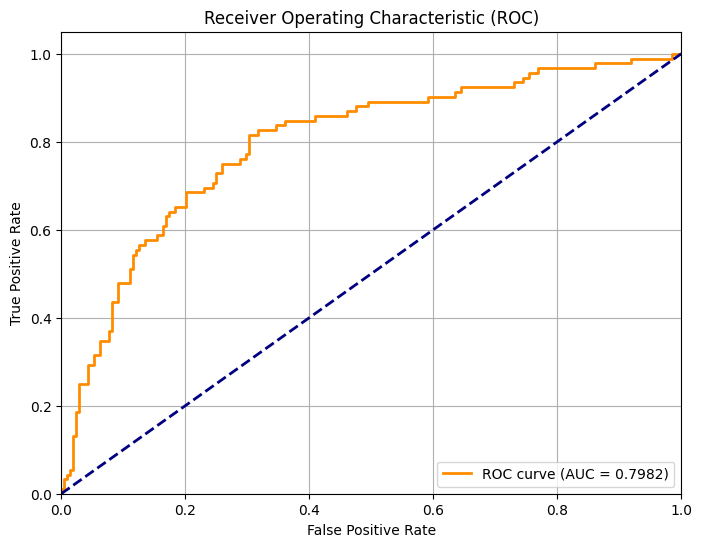

In [ ]:
# 畫圖
from sklearn.metrics import auc
# 1. 計算 FPR, TPR (y_test 和 y_pred_proba)
# y_pred_proba 是預測為"1"的機率，model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])

# 2. 計算 AUC 分數
roc_auc = auc(fpr, tpr)

# 3. 畫圖
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # 隨機猜測的對角線

# 4. 設定標籤與標題
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('ROC_result.png', dpi=300)
plt.show()
